[Back to Assignment 6](_Oving6.ipynb)
# Newton's method and systems of ODEs 

In this assignment you will use solve a system of ODE's using the backward Euler method and Newton iterations. We have studied Newton iterations for scalar equations, but in this assignment we will implement it for a vector-valued algebraic equation. 

Here we will be using $\texttt{np.array()}$, which is how you write a vector or matrix in Python and $\texttt{np.zeros((n,m))}$, which creates an $n\times m$ matrix of zeros. Arrays are treated just like matrices and vectors are in math. You can multiply them by scalar and add them in the usual way. But if you want to more complicated operations like take a dot or cross product or transpose a vector then you have to use more functions, however these are not needed in this assignment and you only need scalar multiplication and addition. 

## 0. (Warm-up questions with solutions)

### a) 
Create matrices $A = \left(\begin{array}{cc}1&2\\3&1\\ \end{array}\right)$  and $B = \left(\begin{array}{cc}2&1\\1&4\\ \end{array}\right)$. 

### b) 
Now create a new matrix $C = 10A + B$.

### c) 
Create the (column) vectors $\mathbf{u}$ and $\mathbf{v}$,  where $\mathbf{u}$ and $\mathbf{v}$ are the columns of $C$. That is $C = (\mathbf{u},\mathbf{v})$

### d) 
Now replace the last row of $B$ with $\mathbf{v}^T$

### **Solutions to warmup questions:**

In [40]:
import numpy as np

#a)
A = np.array([[1,2],[3,1]])
B = np.array([[2,1],[1,4]])
print(A)
print()
print(B)
print()

#b)
C = 10*A + B
print(C)
print()

#c)

u = np.array([[C[0,0]],[C[1,0]]])
print(u)
print()
v = np.array([[C[0,1]],[C[1,1]]])
print(v)
print()

#d) 
B[1,:] = np.transpose(v)
print(B)

#Solution

# a)
A = np.array([[1,2],[3,1]]) # note that matrices use nested brackets: [[],[]], whereas a vector only uses a single pair of brackets: []
B = np.array([[2,1],[1,4]])

# b)
C = 10*A+B 

# c)
u = C[:,0] # note that the first element is indexed by a 0. The colon is used to take all the elements
v = C[:,1] # this reads: Take all the rows of the second column (indexed by 1) and call it v

# d)
B[-1,:] = v  # the -1 is used to take the LAST row (-2 would take the second last row etc.)



[[1 2]
 [3 1]]

[[2 1]
 [1 4]]

[[12 21]
 [31 14]]

[[12]
 [31]]

[[21]
 [14]]

[[ 2  1]
 [21 14]]


## 1. 
We will solve the following set of ODE's 

\begin{align}
\dot{x}_0 =&\, -4x_1x_0^2\\
\dot{x}_1 =&\, 2x_0^2-\frac{x_1}{10}\\
\end{align}
The following code solves the above equations using the Forward Euler method. We will modify this code to use the backward Euler method with Newton iterations. Make sure you understand each line of the code before starting the questions. 

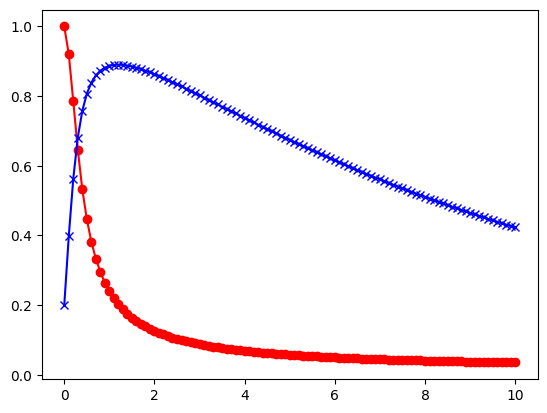

In [2]:
import numpy as np                           # Import numpy for arrays
import matplotlib.pyplot as plt              # Import plotting library

dt = 0.1                                     # Time-step
T  = 10                                      # Total integration time 
nt = round(T/dt)                             # Total number of time-steps
x  = np.zeros((2,nt+1))                      # Make a matrix (array) with 2 rows and nt+1 columns called x
x[:,0]  = np.array([1,0.2])                  # Set the first column of x equal to [1,0.2] (the rest are still zero) this column is x_0 or the "intitial conditions" 

def f(x):                                    # Define a vector-valued function f that takes a vector x and returns a vector f(x)
    return np.array([-4*x[1]*x[0]**2,2*x[0]**2-0.1*x[1]])

# You will add functions here for the g(x) and the Jacobian of f and g

for it in range(0,nt):
    x[:,it+1] = x[:,it] + dt*f(x[:,it])      # Forward Euler (you will modify this line to implement the backward Euler method with Newton iterations)
    
t = np.array(range(0,nt+1))*dt               # The discrete times that the solution is evaluated on (i.e., the horizontal axis of the following plot)
plt.plot(t,x[0,:],'ro-',t,x[1,:],'bx-')      # Plot both solution components, now using arrays

### a) 

To implement the Backward Euler method we will need to implement Newton's method for systems of algebraic equations:

$$\mathbf{g}(\mathbf{x})=0.$$

To solve this using Newton's method, we use the \(n\)-dimensional Newton method:

$$\mathbf{x}_{k+1}  = \mathbf{x}_k - \mathbf{g}'(\mathbf{x}_k)^{-1}\mathbf{g}(\mathbf{x}_k),$$

where $(\mathbf{x})$ and $(\mathbf{g}(\mathbf{x}))$ are vectors and $(\mathbf{g}'(\mathbf{x}_k)^{-1})$ is the Jacobian matrix inverse of $(\mathbf{g}(\mathbf{x}_k))$. 

Write a function that takes an initial guess $(\mathbf{x}_0)$, a function $(\mathbf{g})$, and its Jacobian $(\mathbf{g}')$, and returns the root of $(\mathbf{g}(\mathbf{x}) = \mathbf{0})$ using Newton's method in multiple dimensions.

To make sure that your code works, you could test it on a very simple function, for example, $(\mathbf{g}(\mathbf{x}) = \left(\begin{array}{c}(x_0-1)^2\\(x_1-2)^2\\ \end{array}\right))$, which has a root at $(\left(\begin{array}{c}1\\2\\ \end{array}\right)).$


In [ ]:
import numpy as np                           # Import numpy for arrays
import matplotlib.pyplot as plt              # Import plotting library

dt = 0.1                                     # Time-step
T  = 10                                      # Total integration time 
nt = round(T/dt)                             # Total number of time-steps
x  = np.zeros((2,nt+1))                      # Make a matrix (array) with 2 rows and nt+1 columns called x
x[:,0]  = np.array([1,0.2])                  # Set the first column of x equal to [1,0.2] (the rest are still zero) this column is x_0 or the "intitial conditions" 

def f(x):                                    # Define a vector-valued function f that takes a vector x and returns a vector f(x)
    return np.array([-4*x[1]*x[0]**2,2*x[0]**2-0.1*x[1]])

# You will add functions here for the g(x) and the Jacobian of f and g
def g(x):

    



for it in range(0,nt):
    x[:,it+1] = x[:,it] + dt*f(x[:,it])      # Forward Euler (you will modify this line to implement the backward Euler method with Newton iterations)
    
t = np.array(range(0,nt+1))*dt               # The discrete times that the solution is evaluated on (i.e., the horizontal axis of the following plot)
plt.plot(t,x[0,:],'ro-',t,x[1,:],'bx-')      # Plot both solution components, now using arrays

### b)
Now we will modify the above code to use the backward Euler method with Newton iterations. We will apply Newton iterations on the backward Euler method, which looks like

$$\mathbf{x}_{n+1} = \mathbf{x}_n + \Delta t \, \mathbf{f}(\mathbf{x}_{n+1})$$
which means that you should apply your Newton iterations to the function 
$$\mathbf{g}(\mathbf{x}_n,\mathbf{x}_{n+1}) = \mathbf{x}_n + \Delta t \, \mathbf{f}(\mathbf{x}_{n+1}) - \mathbf{x}_{n+1} = \mathbf{0},$$
where $\mathbf{x}_n$ is already known. The Jacobian matrix (the derivative is taken with respect to $\mathbf{x}_{n+1}$) is given by 
$$\mathbf{g}'(\mathbf{x}_{n+1}) = \Delta t \, \mathbf{f}'(\mathbf{x}_{n+1}) - \mathbf{I}$$
where $\mathbf{I}$ is the identity matrix.

Note: the function $\mathbf{g}$ requires two input variables $\mathbf{x}_n$ and $\mathbf{x}_{n+1}$. Make sure you are giving it the correct values and that it is being passed into the Newton iteration correctly! 